# Write a program to execute speech preprocessing
•	Identify sampling frequency
•	Identify bit resolution
•	Make sampling frequency fs = 8000 then save the signal.


Original Sampling Frequency: 44100
Original Bit Resolution: float32


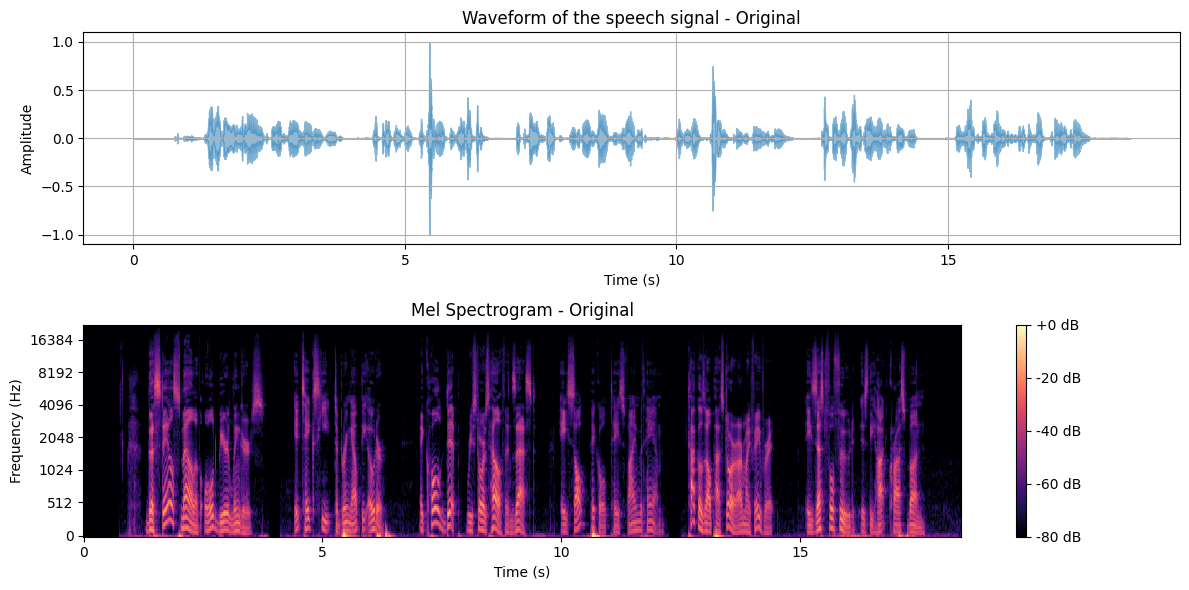

Resampled Sampling Frequency: 8000
Resampled Bit Resolution: float32


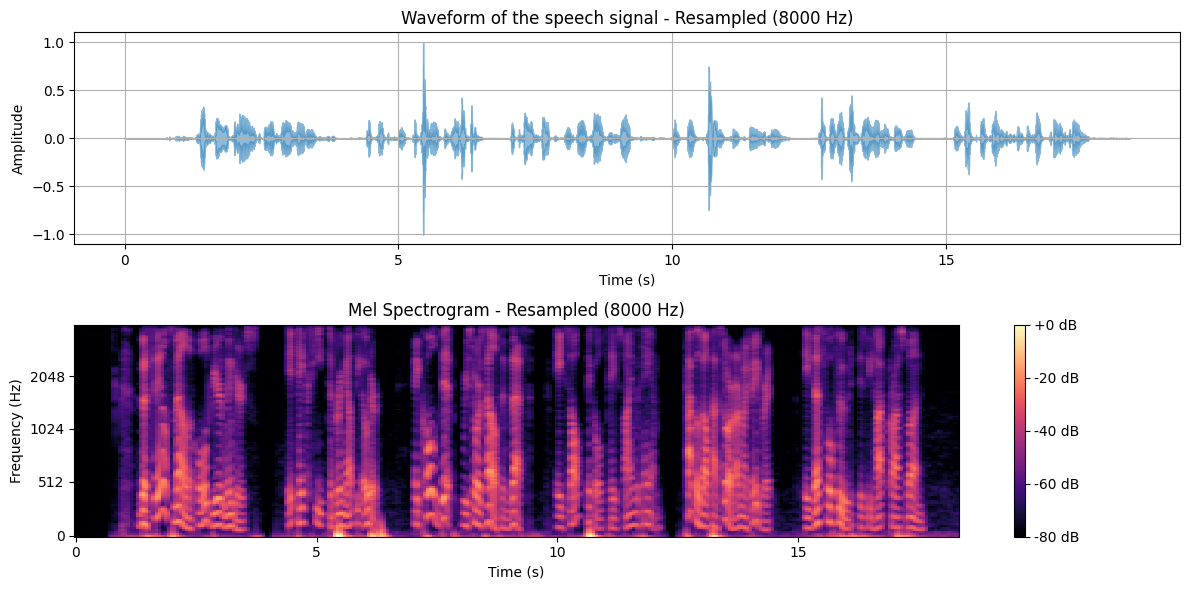

In [45]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, display

# Example usage:
file_path = "/content/harvard.wav"

def plot_waveform_and_spectrogram(signal, sr, title):
    # Plot the waveform
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(signal, sr=sr, alpha=0.5)
    plt.title('Waveform of the speech signal - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()

    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

# Load the audio file with Librosa
signal, sr = librosa.load(file_path, sr=None)

# Identify sampling frequency and bit resolution
print('Original Sampling Frequency:', sr)
print('Original Bit Resolution:', signal.dtype)

# Plot waveform and spectrogram of the original signal
plot_waveform_and_spectrogram(signal, sr, 'Original')

# Play the original signal
display(Audio(signal, rate=sr))

# Set sampling frequency to 8000 Hz
sr_8000 = 8000
signal_resampled = librosa.resample(signal, orig_sr=sr, target_sr=sr_8000)

# Identify sampling frequency and bit resolution of the resampled signal
print('Resampled Sampling Frequency:', sr_8000)
print('Resampled Bit Resolution:', signal_resampled.dtype)

# Save the resampled signal
wavfile.write('speech_signal_8000Hz.wav', sr_8000, (signal_resampled * 32767).astype(np.int16))

# Plot waveform and spectrogram of the resampled signal
plot_waveform_and_spectrogram(signal_resampled, sr_8000, 'Resampled (8000 Hz)')

# Play the resampled signal
display(Audio(signal_resampled, rate=sr_8000))


Resampled Sampling Frequency: 8000
Resampled Bit Resolution: int16


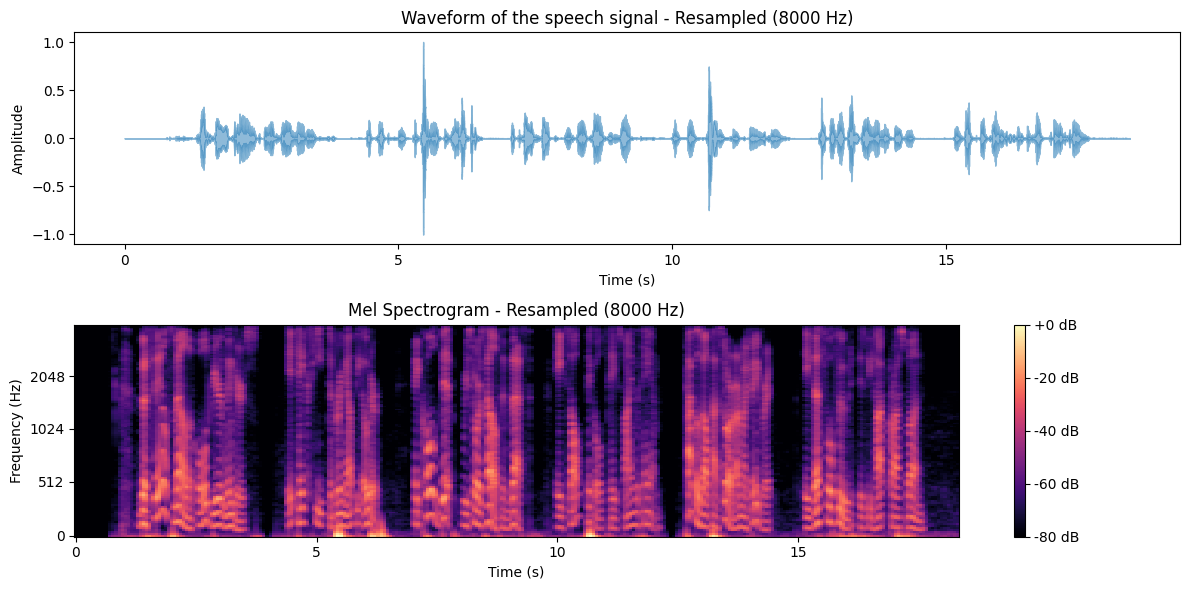

In [20]:
# Reduce bit resolution to 16 bits
signal_resampled_16bit = (signal_resampled * 32767).astype(np.int16)

# Identify sampling frequency and bit resolution of the resampled signal
print('Resampled Sampling Frequency:', sr_8000)
print('Resampled Bit Resolution:', signal_resampled_16bit.dtype)

# Save the resampled signal with reduced bit resolution
wavfile.write('speech_signal_8000Hz_16bit.wav', sr_8000, signal_resampled_16bit)

# Plot waveform and spectrogram of the resampled signal
plot_waveform_and_spectrogram(signal_resampled, sr_8000, 'Resampled (8000 Hz)')

# Play the resampled signal
display(Audio(signal_resampled, rate=sr_8000))

# Write a program to display the region of a speech signal.
•	Voice region.
•	Un-voice region.
•	Silence region.


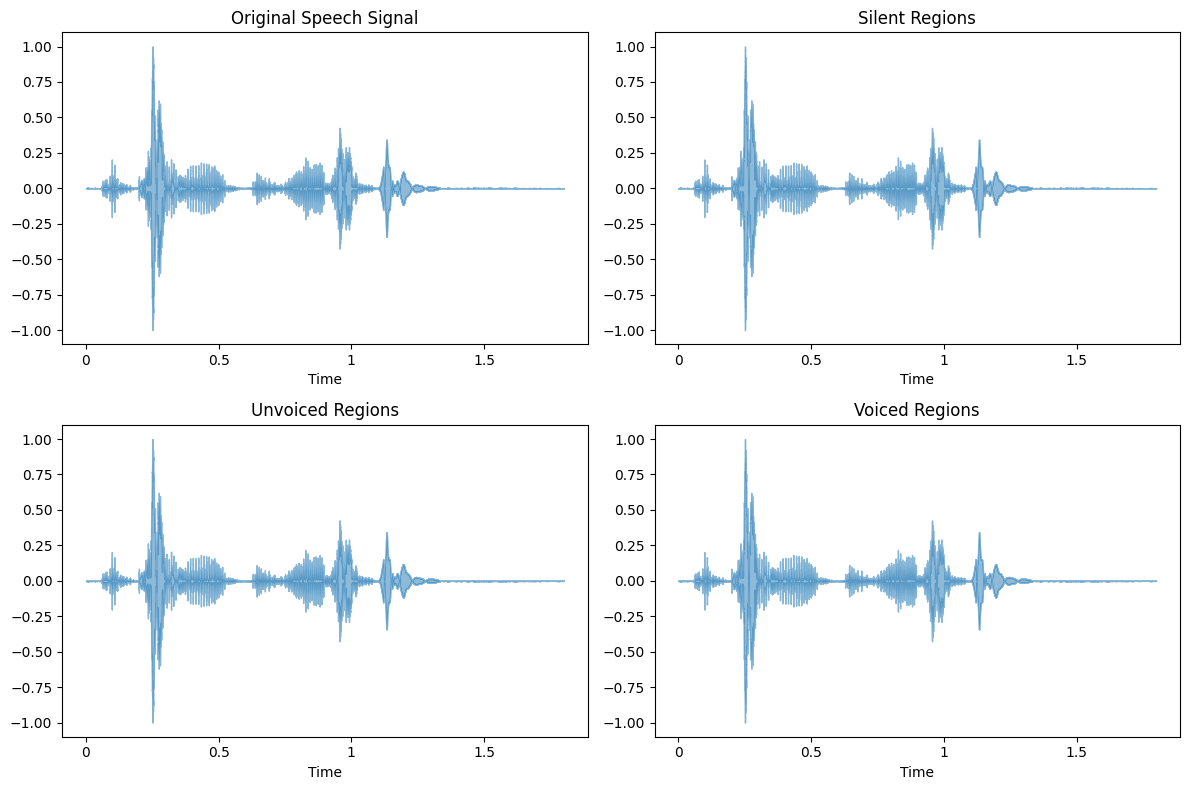

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display

def energy_based_vad(signal, sr):
    # Compute the short-term energy of the signal
    energy = librosa.feature.rms(y=signal, frame_length=2048, hop_length=512)[0]

    # Set a threshold to classify frames as voiced, unvoiced, or silent
    threshold = np.mean(energy) * 1.5  # Adjust multiplier as needed

    # Classify frames based on energy
    voiced_segments = []
    unvoiced_segments = []
    silent_segments = []

    current_segment_start = 0
    for i, e in enumerate(energy):
        if e > threshold:
            # Voiced segment
            if not voiced_segments:
                current_segment_start = i
            elif unvoiced_segments:
                unvoiced_segments.pop()
            elif silent_segments:
                silent_segments.pop()
        else:
            # Unvoiced or silent segment
            if voiced_segments:
                voiced_segments.append((current_segment_start, i))
            elif not unvoiced_segments:
                current_segment_start = i
            elif voiced_segments:
                voiced_segments.pop()

    # Add the last segment if it's voiced
    if voiced_segments:
        voiced_segments.append((current_segment_start, len(energy)))
    elif unvoiced_segments:
        unvoiced_segments.append((current_segment_start, len(energy)))
    elif silent_segments:
        silent_segments.append((current_segment_start, len(energy)))

    return voiced_segments, unvoiced_segments, silent_segments

def display_speech_regions(signal, sr):
    # Compute voiced, unvoiced, and silent regions
    voiced_segments, unvoiced_segments, silent_segments = energy_based_vad(signal, sr)

    # Plot the speech signal with voice, unvoiced, and silent regions
    plt.figure(figsize=(12, 8))

    # Plot original waveform
    plt.subplot(2, 2, 1)
    librosa.display.waveshow(signal, sr=sr, alpha=0.5)
    plt.title('Original Speech Signal')

    # Overlay silent regions in blue
    plt.subplot(2, 2, 2)
    librosa.display.waveshow(signal, sr=sr, alpha=0.5)
    for start, end in silent_segments:
        plt.axvspan(librosa.frames_to_time(start), librosa.frames_to_time(end), color='blue', alpha=0.3, lw=0)
    plt.title('Silent Regions')

    # Overlay unvoiced regions in red
    plt.subplot(2, 2, 3)
    librosa.display.waveshow(signal, sr=sr, alpha=0.5)
    for start, end in unvoiced_segments:
        plt.axvspan(librosa.frames_to_time(start), librosa.frames_to_time(end), color='red', alpha=0.3, lw=0)
    plt.title('Unvoiced Regions')

    # Overlay voice regions in green
    plt.subplot(2, 2, 4)
    librosa.display.waveshow(signal, sr=sr, alpha=0.5)
    for start, end in voiced_segments:
        plt.axvspan(librosa.frames_to_time(start), librosa.frames_to_time(end), color='green', alpha=0.3, lw=0)
    plt.title('Voiced Regions')

    plt.tight_layout()
    plt.show()

    # Play the audio
    display(Audio(signal, rate=sr))

# Load the audio file
audio_file = "/content/harvard.wav"
signal, sr = librosa.load(audio_file, sr=None)

# Cut a portion of the speech signal (for example, from 5 to 7 seconds)
cut_signal = signal[int(sr*5.2):sr*7]  # Adjust the duration as needed

# Display speech regions of the cut portion along with the original waveform
display_speech_regions(cut_signal, sr)


# Write a program to compute zero crossing rate (ZCR) using different window function of a speech signal.

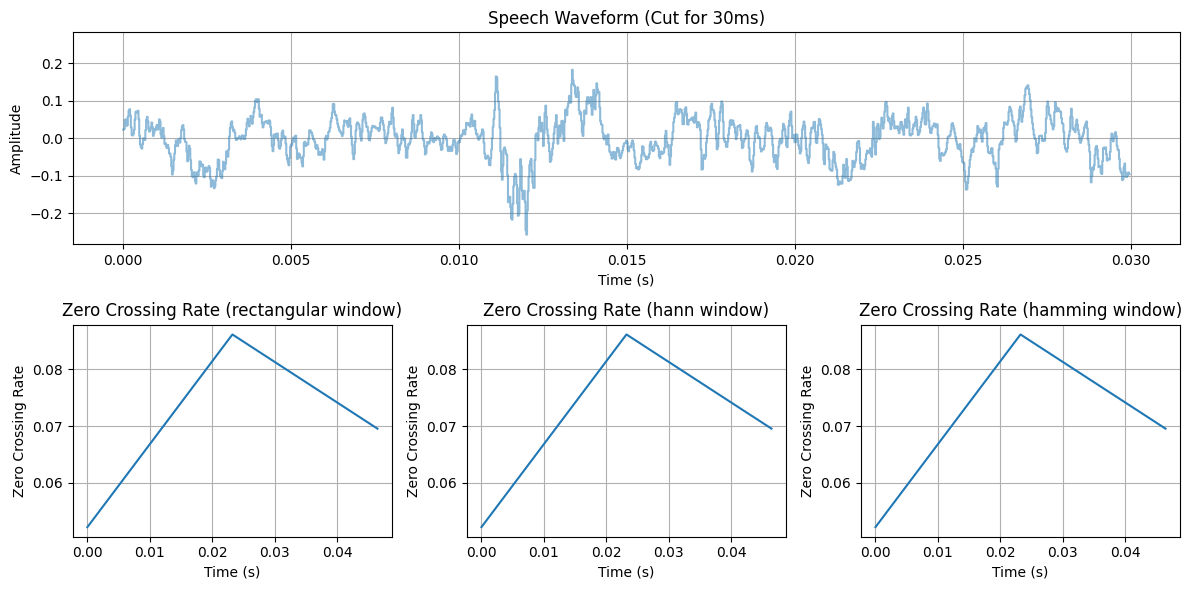

In [38]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# Load the audio file
audio_file = "/content/jackhammer.wav"
signal, sr = librosa.load(audio_file, sr=None)

# Play the audio
display(Audio(signal, rate=sr))

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(sr * 2.5):int(sr * 2.53)]

# Parameters
frame_length = int(sr * 0.03)  # 30 ms frame length
hop_length = 512

# Compute zero-crossing rate (ZCR) for the cut portion with different window functions
window_functions = ['rectangular', 'hann', 'hamming']

plt.figure(figsize=(12, 6))

# Plot speech waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(cut_signal, sr=sr, alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Speech Waveform (Cut for 30ms)')
plt.grid(True)

for i, window_function in enumerate(window_functions, start=1):
    # Compute window function
    if window_function == 'rectangular':
        window = np.ones(frame_length)
    else:
        window = librosa.filters.get_window(window_function, frame_length, fftbins=True)

    # Truncate window to match the length of the signal
    window = window[:len(cut_signal)]

    # Apply window to the signal
    signal_windowed = cut_signal * window

    # Compute zero-crossing rate (ZCR)
    zcr = librosa.feature.zero_crossing_rate(y=signal_windowed, frame_length=frame_length, hop_length=hop_length)

    # Plot zero crossing rate
    plt.subplot(2, len(window_functions), len(window_functions) + i)
    plt.plot(librosa.frames_to_time(range(len(zcr[0])), hop_length=hop_length), zcr[0])
    plt.xlabel('Time (s)')
    plt.ylabel('Zero Crossing Rate')
    plt.title(f'Zero Crossing Rate ({window_function} window)')
    plt.grid(True)

plt.tight_layout()
plt.show()


# Write a program to compute short term auto-correlation of a speech signal.

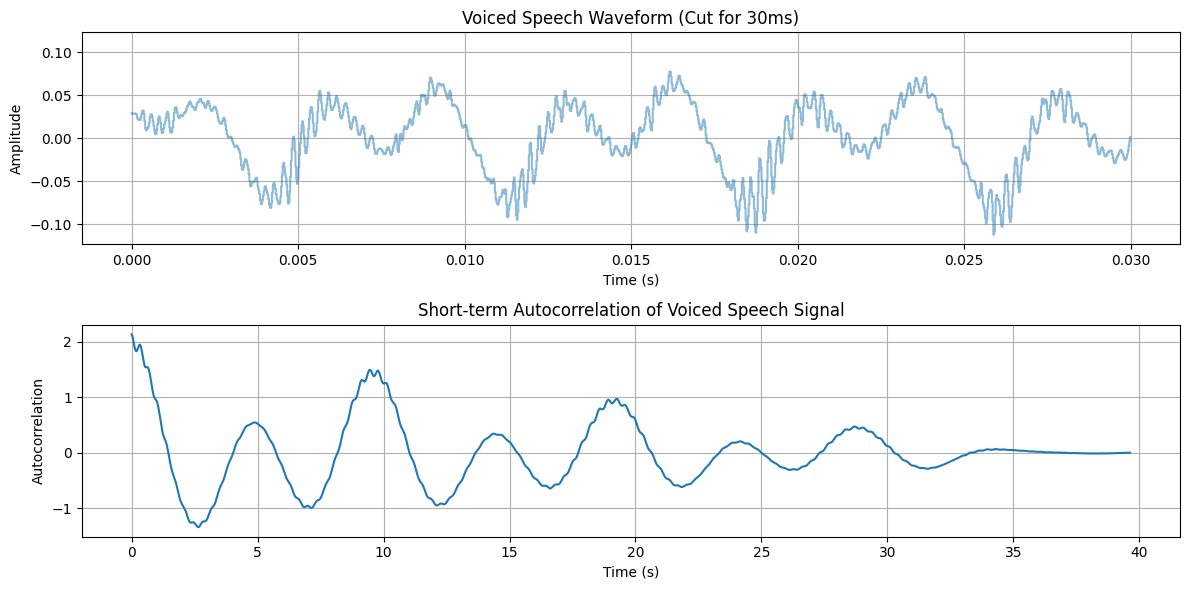

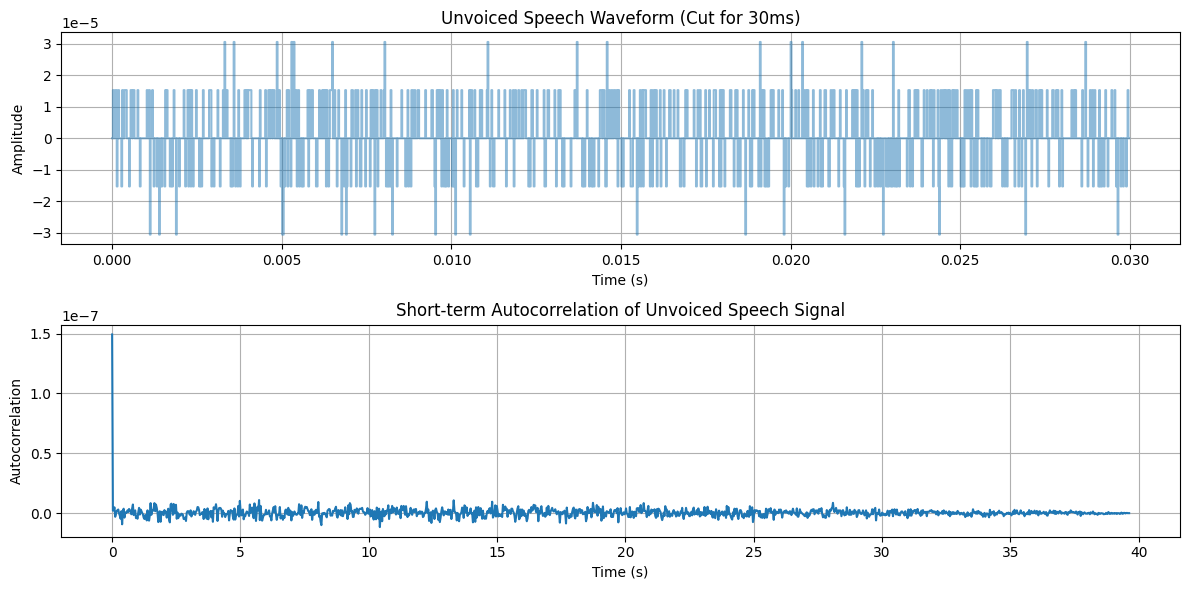

In [53]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, type):

    # Compute short-term autocorrelation
    auto_corr = librosa.autocorrelate(y=cut_signal, max_size=frame_length)

    # Plot speech waveform and autocorrelation
    plt.figure(figsize=(12, 6))

    # Plot speech waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(cut_signal, sr=sr, alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(type +' Speech Waveform (Cut for 30ms)')
    plt.grid(True)

    # Plot autocorrelation
    plt.subplot(2, 1, 2)
    plt.plot(librosa.frames_to_time(range(len(auto_corr)), hop_length=hop_length), auto_corr)
    plt.xlabel('Time (s)')
    plt.ylabel('Autocorrelation')
    plt.title('Short-term Autocorrelation of ' + type + ' Speech Signal')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Usage example
audio_file = "/content/harvard.wav"
# Load the audio file
signal, sr = librosa.load(audio_file, sr=None)
# Parameters
frame_duration = 0.03  # 30 ms frame duration
hop_duration = frame_duration / 2  # Half of frame duration for 50% overlap

# Convert durations to samples
frame_length = int(sr * frame_duration)
hop_length = int(sr * hop_duration)

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(5*sr) : int(5.03*sr)]
compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, 'Voiced')

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(4*sr) : int(4.03*sr)]
compute_short_term_autocorrelation(cut_signal, sr, frame_length, hop_length, 'Unvoiced')


# Write a program to estimate pitch information of a speech signal

In [ ]:
import wave
import numpy as np
import librosa
from scipy.io import wavfile

def estimate_pitch(signal, sr):
    # Get the autocorrelation of the signal
    autocorr = librosa.autocorrelate(signal)

    # Get the fundamental frequency (pitch) using the autocorrelation
    fundamental_freq = librosa.pitch_tuning(autocorr)

    return fundamental_freq


# Load the speech signal using wavefile.read
fs, signal = wavfile.read("/content/harvard.wav")

# Estimate the pitch
pitch = estimate_pitch(signal, fs)

print("Estimated fundamental frequency (pitch): {:.2f} Hz".format(pitch))


<ipython-input-4-8c141165322d>:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, signal = wavfile.read("/content/harvard.wav")


Estimated fundamental frequency (pitch): -0.38 Hz
